In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

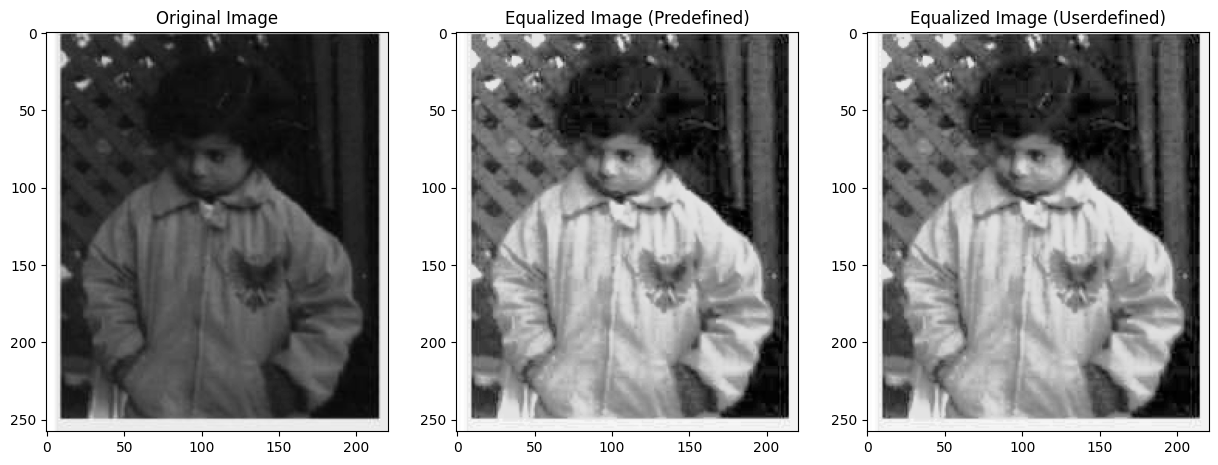

In [20]:
# Predefined function for histogram equalization
def hist_equalization_predefined(img):
    return cv2.equalizeHist(img)

# User-defined function for histogram equalization
def hist_equalization(img):
    # Compute the histogram of the input image
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    
    # Compute the cumulative distribution function
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf.max()
    
    # Apply the histogram equalization to the input image
    img_equalized = np.interp(img.flatten(), bins[:-1], cdf_normalized).reshape(img.shape).astype(np.uint8)
    
    return img_equalized

# Load the "pout-dark" image
img = cv2.imread("pout-dark.jpg", 0)

# Perform histogram equalization using the predefined function
img_predefined = hist_equalization_predefined(img)

# Perform histogram equalization using the user-defined function
img_userdefined = hist_equalization(img)

# Display the original and equalized images
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(img_predefined, cmap='gray')
ax[1].set_title("Equalized Image (Predefined)")

ax[2].imshow(img_userdefined, cmap='gray')
ax[2].set_title("Equalized Image (Userdefined)")

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


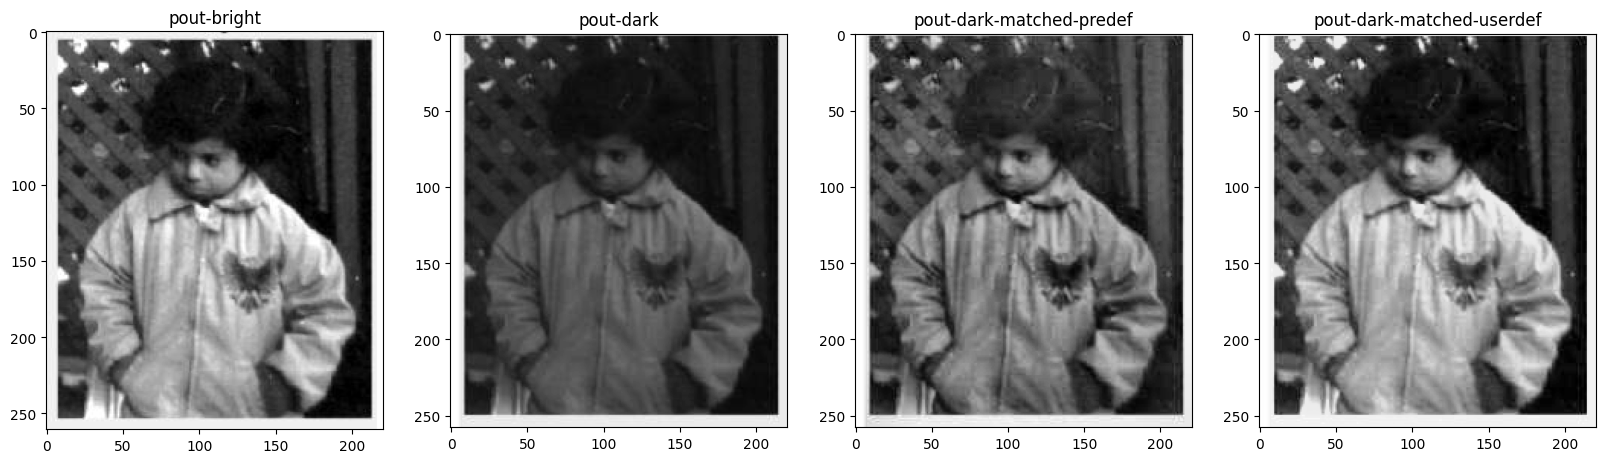

In [19]:
# User-defined function for histogram matching
def hist_match(source, template):
    old_shape = source.shape
    source = source.ravel()
    template = template.ravel()

    # Compute the histograms of the source and template images
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # Normalize the histograms
    s_quantiles = np.cumsum(s_counts).astype(np.float64) / source.size
    t_quantiles = np.cumsum(t_counts).astype(np.float64) / template.size

    # Round the quantiles to the nearest integer
    s_quantiles = (s_quantiles * 255).round().astype(np.uint8)
    t_quantiles = (t_quantiles * 255).round().astype(np.uint8)

    # Interpolate the values of the source image to match the template
    interp_values = np.interp(s_quantiles, t_quantiles, t_values)

    # Reshape the interpolated image and return it
    return interp_values[bin_idx].reshape(old_shape)


# Load the images
pout_bright = cv2.imread('pout-bright.jpg', cv2.IMREAD_GRAYSCALE)
pout_dark = cv2.imread('pout-dark.jpg', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization on the pout-dark image
pout_dark_eq = cv2.equalizeHist(pout_dark)

# Perform histogram matching on the pout-dark image using the pout-bright image as a reference
pout_dark_matched_predef = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(pout_dark)
pout_dark_matched_userdef = hist_match(pout_dark, pout_bright)

# Display the results
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
ax[0].imshow(pout_bright, cmap='gray')
ax[0].set_title("pout-bright")

ax[1].imshow(pout_dark, cmap='gray')
ax[1].set_title("pout-dark")

ax[2].imshow(pout_dark_matched_predef, cmap='gray')
ax[2].set_title("pout-dark-matched-predef")

ax[3].imshow(pout_dark_matched_userdef, cmap='gray')
ax[3].set_title("pout-dark-matched-userdef")

plt.show()

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()